<a href="https://colab.research.google.com/github/Brandonitas/Sistemas_Inteligentes/blob/master/AventuraPokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>ITESM CSF y CCM, 
Escuela Ingeniería y Ciencias, 
Computación</center></h1>

<h3><center>Course: TC2010.500 (Intelligent Systems)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Final Project</center></h3>
    
<h3><center>Date: November 24th, 2020</center></h3>

---

<h3>Grade: </h3>

---
<h4><center>Student's information</center></h4>
<h4>Names: Juan Francisco Gortarez / Brandon Reyes / Samantha Barco Mejía</h4>    <h4>Students ID: A01021926 / A01335537 / A01196844</h4>    <h4>Github: </h4> 
<ul> 
<li></li>
<li></li>
<li></li> 
</ul>

Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este examen esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este examen de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida

# <font color="brown">Proyecto Final</font>

---

## Objetivo:
El objetivo de este proyecto es implementar los conocimientos adquiridos durante la clase de Inteligencia Artificial en un proyecto seleccionado por nuestro equipo.
Nosotros hemos decidido enfocarnos en el desarrollo de un Notebook que permita identificar los diferentes tipos de Pokemon que existen. Utilizando algoritmos como KNN, Logistic Regression, Random Forest y Decision Tree hemos logrado entrenar nuestro Pokédex.

## Descripción:
Este Notebook contiene en detalle el código y las librerias implementadas que nos permitieron alcanzar nuestro objetivo. Al final, pudimos entrenar los algoritmos de manera que identificaran si un Pokemon es legendario o no basandose en sus atributos.

# EDA Pokemon y algo más...

Comparar varios tipos y atributos de Pokémon de las Gens 1 y 2 (ya que estos son los que me gustan...) con algunas imágenes y en el proceso podremos hacer un webscraping para mejorar un poco el conjunto de datos.

In [ ]:


# Data manipulation libraries
import numpy as np 
import pandas as pd 

from google.colab import drive
drive.mount('/content/drive')

# Data visualisation 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Web scraping 
from bs4 import BeautifulSoup, Comment
from requests import get

## Reading the data
pokemon = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/data/Pokemon.csv')

Mounted at /content/drive



### Datos - Preparación y Limpieza

Algo de exploración básica...


In [ ]:
print(pokemon.head())
print(pokemon.info())

   #                   Name Type 1  ... Speed  Generation  Legendary
0  1              Bulbasaur  Grass  ...    45           1      False
1  2                Ivysaur  Grass  ...    60           1      False
2  3               Venusaur  Grass  ...    80           1      False
3  3  VenusaurMega Venusaur  Grass  ...    80           1      False
4  4             Charmander   Fire  ...    65           1      False

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     8

In [ ]:
pokemon

#                   Name   Type 1  ... Speed  Generation  Legendary
0      1              Bulbasaur    Grass  ...    45           1      False
1      2                Ivysaur    Grass  ...    60           1      False
2      3               Venusaur    Grass  ...    80           1      False
3      3  VenusaurMega Venusaur    Grass  ...    80           1      False
4      4             Charmander     Fire  ...    65           1      False
..   ...                    ...      ...  ...   ...         ...        ...
795  719                Diancie     Rock  ...    50           6       True
796  719    DiancieMega Diancie     Rock  ...   110           6       True
797  720    HoopaHoopa Confined  Psychic  ...    70           6       True
798  720     HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721              Volcanion     Fire  ...    70           6       True

[800 rows x 13 columns]

In [ ]:
# Desechar #
pokemon.drop(['#'], axis = 'columns', inplace = True)

#Gen V best gen
my_pokemon = pokemon[pokemon.Generation.isin([1,2,3,4,5])].copy()
my_pokemon.Generation.unique()
my_pokemon.shape

(718, 12)

In [ ]:
print('There are ',my_pokemon.duplicated('Name').sum(), 'duplicated names in the dataset, so it must be something else\n')
print(my_pokemon.loc[(my_pokemon.Generation == 1) & (my_pokemon.Legendary == True), 'Name'],  '''\nAha! We didn't have MEGA stuff back in my day. Let's exclude those\n''')

There are  0 duplicated names in the dataset, so it must be something else

156               Articuno
157                 Zapdos
158                Moltres
162                 Mewtwo
163    MewtwoMega Mewtwo X
164    MewtwoMega Mewtwo Y
Name: Name, dtype: object 
Aha! We didn't have MEGA stuff back in my day. Let's exclude those



In [ ]:
mega_filter = (my_pokemon.Name.str.contains('Mega ')) #Put a space there to exclude meganium which is a legit second generation pokemon
my_pokemon = my_pokemon[~mega_filter]
print(my_pokemon.groupby('Generation').size(),  '\nOk now everything matches my expectations!')

Generation
1    151
2    100
3    140
4    116
5    164
dtype: int64 
Ok now everything matches my expectations!


Nosotros queremos a todas las generaciones por igual (menos la 7), y entonces incluimos hasta la generación 5 para añadir profundidad y cantidad de datos. 

### Atributos de Pokémon y cómo se relacionan entre sí

Como tenemos 251 Pokémon y 6 atributos para cada uno de ellos, pensé que haría un desglose de cómo se relacionan entre sí.
¿Los Pokémon con mayor defensa también tienen un mayor ataque? ¿Los Pokémon rápidos también son buenos defensivamente?
Con ese fin, usaremos un par de cuadrículas de Seaborn. Es una cuadrícula bastante personalizable donde puede mapear diferentes tipos de parcelas en el triángulo superior, triángulo inferior y ejes diagonales.
La figura producida tiene tres tramas:

    Triángulo superior -> Diagrama de dispersión para cada pokemon con naranja que indica pokemon legendario (diagrama de dispersión de Seaborn)
    Diagonal -> Gráfico de densidad de kernel para cada atributo (Seabon kdplot)
    Triángulo inferior -> Gráfico de dispersión con un ajuste de modelo de regresión lineal (gráfico de reglaje de Seaborn)

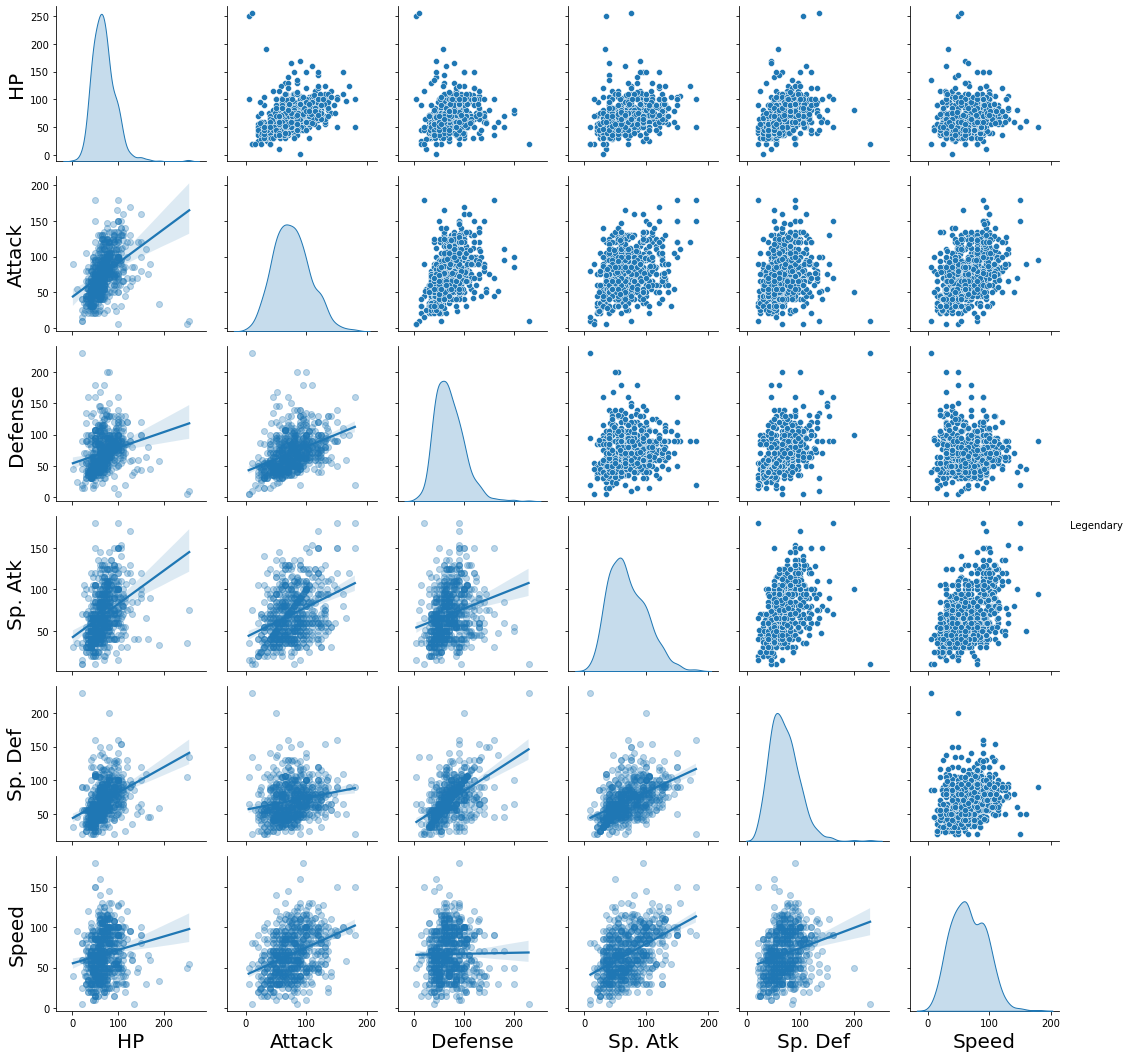

In [ ]:
def my_pairgrid(input_df):
    mpl.rcParams["axes.labelsize"] = 20 #Increases the axis titles and the legend size
    g = sns.PairGrid(input_df, vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
    g = g.map_diag(sns.kdeplot, shade=True)
    g = g.map_lower(sns.regplot, scatter_kws={'alpha':0.3})
    g.hue_vals = input_df["Legendary"]
    g.hue_names = input_df["Legendary"].unique()
    g.palette = sns.color_palette("Set2", len(g.hue_names))
    g = g.map_upper(sns.scatterplot).add_legend(title='Legendary', fontsize= 14)
    return(g)
_ = my_pairgrid(my_pokemon)

Así que analicemos algunos hallazgos de este cuadro general:

    Los Pokémon legendarios están en el extremo superior del espectro para la mayoría de atributos.
    Puedo ver algunos signos de una relación positiva entre Ataque y Defensa, Sp.Def y HP, Speed ​​y Attack, así como Speed ​​y Sp.Atk
    La velocidad parece ser el atributo menos concentrado entre los 6


---

### Correlación entre atributos

Si bien el primer gráfico fue útil, quizás una mejor manera de visualizar la correlación entre atributos es un mapa de calor con un azul más fuerte que indica una correlación más alta.



In [ ]:
my_pokemon

Name  Type 1    Type 2  ...  Speed  Generation  Legendary
0                  Bulbasaur   Grass    Poison  ...     45           1      False
1                    Ivysaur   Grass    Poison  ...     60           1      False
2                   Venusaur   Grass    Poison  ...     80           1      False
4                 Charmander    Fire       NaN  ...     65           1      False
5                 Charmeleon    Fire       NaN  ...     80           1      False
..                       ...     ...       ...  ...    ...         ...        ...
713     KeldeoOrdinary Forme   Water  Fighting  ...    108           5      False
714     KeldeoResolute Forme   Water  Fighting  ...    108           5      False
715       MeloettaAria Forme  Normal   Psychic  ...     90           5      False
716  MeloettaPirouette Forme  Normal  Fighting  ...    128           5      False
717                 Genesect     Bug     Steel  ...     99           5      False

[671 rows x 12 columns]

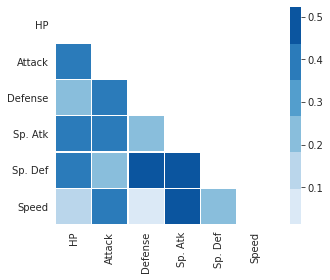

In [ ]:
my_corr = my_pokemon.loc[:, 'HP':'Speed'].corr() 
mask = np.zeros_like(my_corr) 
mask[np.triu_indices_from(mask)] = True ## This part is to blank out the upper diagonal
with sns.axes_style("white"):
     ax = sns.heatmap(my_corr, mask=mask, square=True, cmap=sns.color_palette("Blues"), vmax=np.max(np.sort(my_corr.values)[:,-2]), linewidths=0.3)

# Análisis de atributos por pokemon y tipo

Hagamos un análisis de cómo los atributos varían con el tipo.
Mi primera idea fue usar un Seaborn Swarmplot ya que no tenemos tantos datos que estarán superpoblados.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



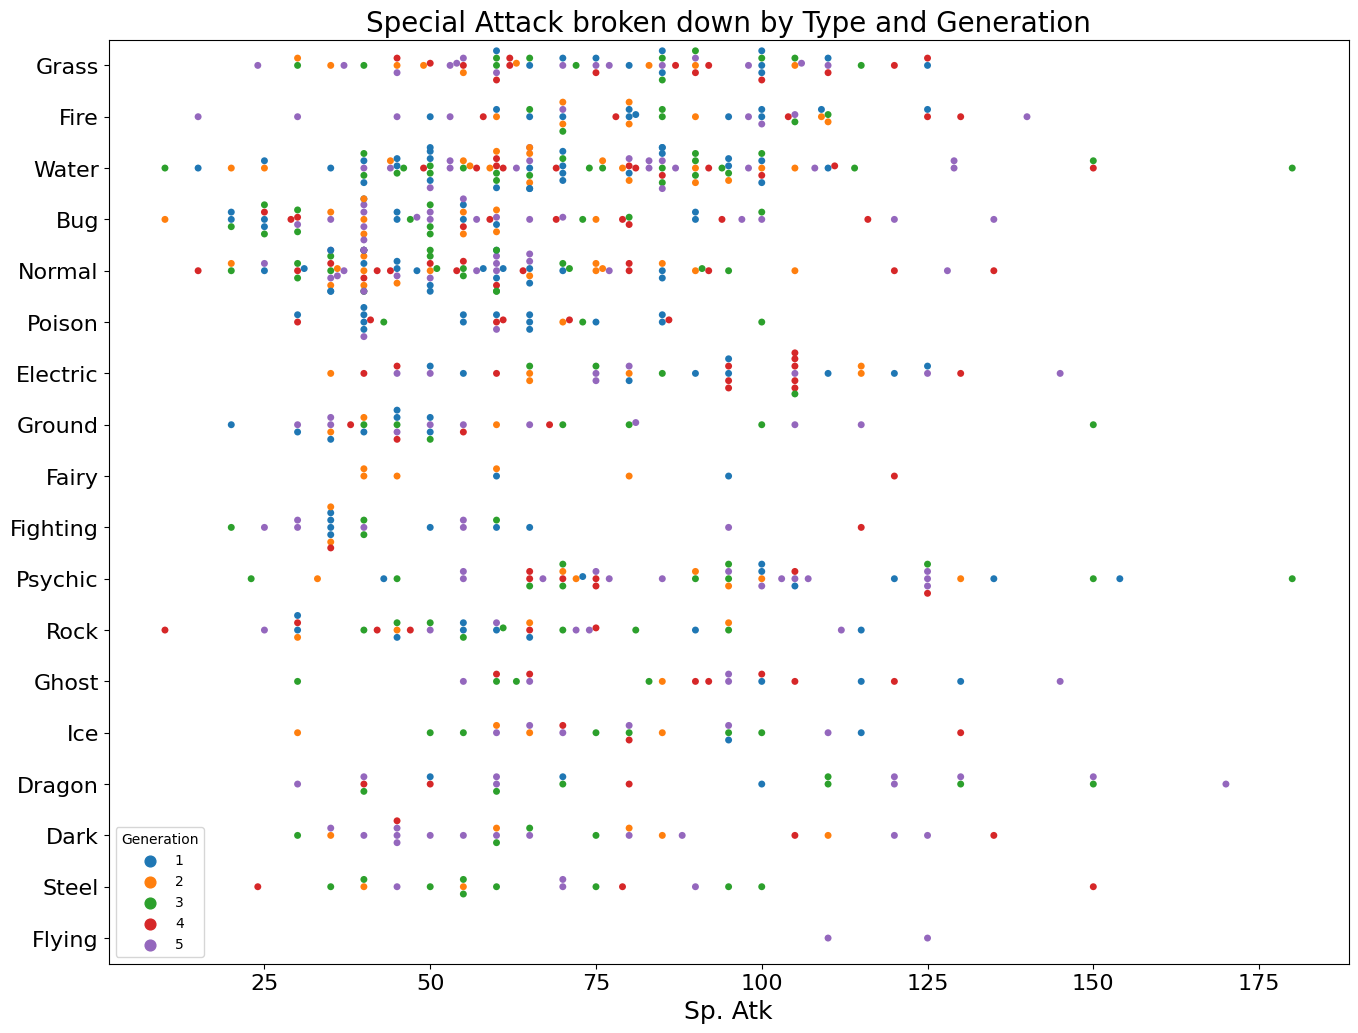

In [ ]:
sns.reset_defaults()
plt.figure(figsize=(16,12))
g = sns.swarmplot(x='Sp. Atk', y='Type 1', hue = 'Generation', data=my_pokemon)
g.yaxis.label.set_visible(False)
g.set_title('Special Attack broken down by Type and Generation')
g.title.set_fontsize(20)
g.xaxis.label.set_fontsize(18)
g.tick_params(axis='x', labelsize=16)
g.tick_params(axis='y', labelsize=16)

Honestamente, el gráfico parece distraer mucho, no puedo distinguir mucho... además de los valores atípicos, notamos que hay un tipo de hada. Este no fue el caso en Gens 1 y 2, ¡los Pokémon de hadas eran Pokémon normales!

In [ ]:
my_pokemon.loc[my_pokemon['Type 1'] == "Fairy", 'Type 1'] = 'Normal'
my_pokemon.loc[my_pokemon['Type 2'] == "Fairy", 'Type 2'] = np.nan

In [ ]:
def attr_per_type(input_df, y_attr, hue_attr):
    mpl.rcParams["font.size"] = 18
    f, axes = plt.subplots(2, 3, figsize=(20, 20), sharey=True, sharex=True)
    #f.tight_layout()
    poke_attributes = ['HP', 'Defense', 'Sp. Def', 'Speed', 'Attack', 'Sp. Atk']
    counter = 0
    #axes[0,1].tick_params(labelleft=False)
    for row in range(2):
        for col in range(3):
            sns.boxplot(y = y_attr, x = poke_attributes[counter], data=input_df, ax=axes[row, col], showfliers=False)
            sns.swarmplot(y = y_attr, x = poke_attributes[counter], data=input_df, ax=axes[row, col], hue = hue_attr, palette=['black', 'orange'])
            axes[row, col].set_title(axes[row, col].get_xlabel())
            axes[row, col].xaxis.label.set_visible(False)
            axes[row, col].get_legend().remove()
            counter += 1
            if (col == 0):
                axes[row, col].yaxis.label.set_visible(False)
                continue
            axes[row, col].yaxis.set_visible(False)
    return(f, axes)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py

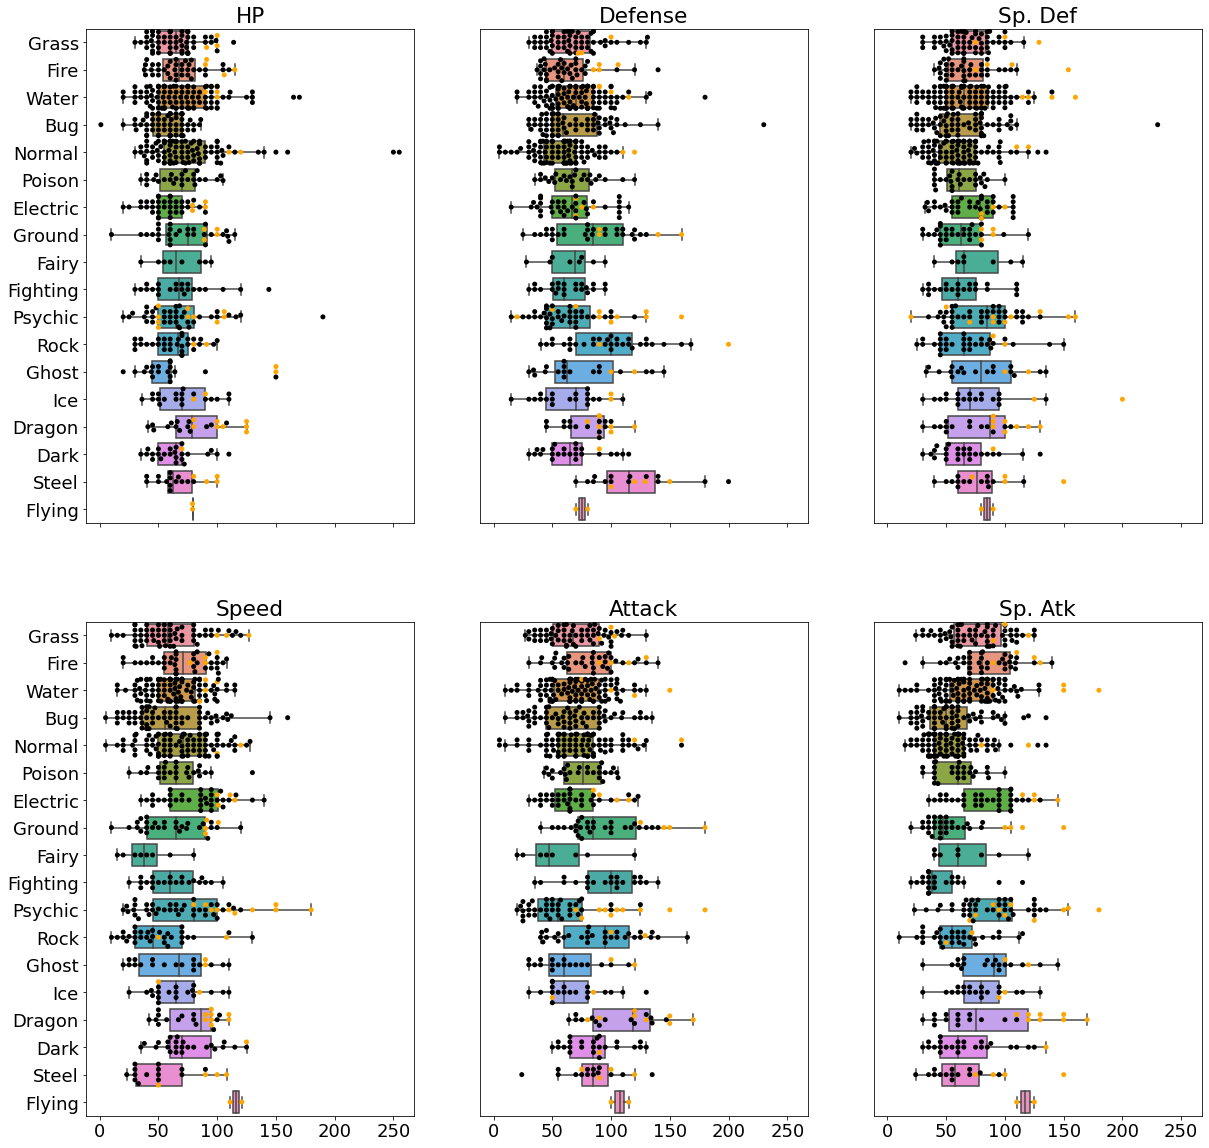

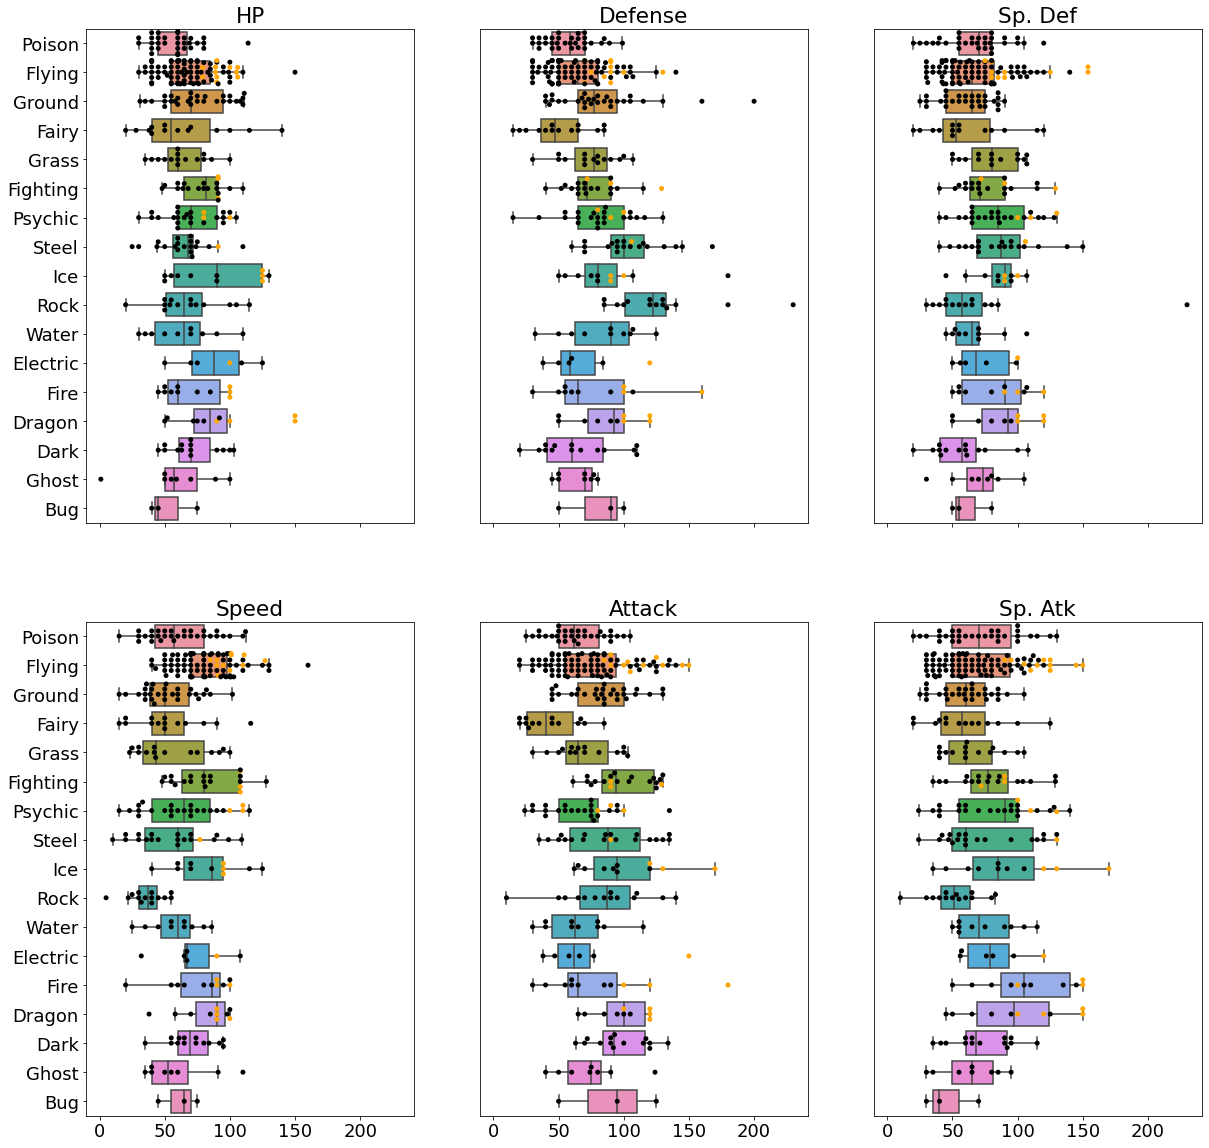

In [ ]:
(f, axes) = attr_per_type(my_pokemon, 'Type 1', 'Legendary')
(f, axes) = attr_per_type(my_pokemon, 'Type 2', 'Legendary')


In [ ]:
my_pokemon.loc[my_pokemon['Type 2']=="Flying"]

Name    Type 1  Type 2  ...  Speed  Generation  Legendary
6                   Charizard      Fire  Flying  ...    100           1      False
15                 Butterfree       Bug  Flying  ...     70           1      False
20                     Pidgey    Normal  Flying  ...     56           1      False
21                  Pidgeotto    Normal  Flying  ...     71           1      False
22                    Pidgeot    Normal  Flying  ...    101           1      False
..                        ...       ...     ...  ...    ...         ...        ...
691                 Mandibuzz      Dark  Flying  ...     80           5      False
704  ThundurusIncarnate Forme  Electric  Flying  ...    111           5       True
705    ThundurusTherian Forme  Electric  Flying  ...    101           5       True
708   LandorusIncarnate Forme    Ground  Flying  ...    101           5       True
709     LandorusTherian Forme    Ground  Flying  ...     91           5       True

[85 rows x 12 columns]

In [ ]:
pip install hiplot

     |████████████████████████████████| 747kB 12.6MB/s 
     |████████████████████████████████| 788kB 31.4MB/s 
     |████████████████████████████████| 358kB 45.7MB/s 
     |████████████████████████████████| 358kB 48.0MB/s 
  Created wheel for flask-compress: filename=Flask_Compress-1.8.0-cp36-none-any.whl size=7215 sha256=65e97ffa9a905eb8b18164517d62305297057c53c533e31b6fbbaa747180d9f1
  Stored in directory: /root/.cache/pip/wheels/f9/aa/e9/c4b763ea17eb0662124f67924cbfb9ee0efa83e28f6131baec
Successfully built flask-compress
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.8 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:

In [ ]:
import hiplot as hip
testhip = hip.Experiment.from_dataframe(my_pokemon)
testhip.display()

<IPython.core.display.Javascript object>

Muy bien, esto se ve mucho mejor! El problema con el conjunto de datos actual es que incluye Pokémon de menor evolución. Por ejemplo, Charmander, Charmeleon y Charizard están todos incluidos. Preferiría que solo se incluyera el último Pokémon de evolución porque la selección se realiza principalmente en función de esos. Tratemos de solucionar este problema raspando el árbol de evolución de Pokémon del sitio web de pokemondb. 

Voy a desglosar cada paso para que sea más comprensible.
---

### Web scraping para mejorar nuestro conjunto de datos

**Paso 1: encontrar la URL**

El sitio web que elegí es el sitio web de pokemondb que enumera las evoluciones de todos los Pokémon en esta forma:

![img](https://i.postimg.cc/qR8yX0qW/Pika.png)


In [ ]:
poke_url = 'https://pokemondb.net/evolution#evo-g2'
response = get(poke_url) 
html_soup = BeautifulSoup(response.text, 'html.parser') ## Getting the html into python

**Paso 2: examinar el HTML de la página y extraer los datos**

Ahora que tenemos el HTML, tenemos que examinar dónde se encuentra exactamente la información que queremos. Podemos utilizar las herramientas de desarrollo de Google Chrome para ver qué parte del árbol HTML nos interesa.

![img](https://i.postimg.cc/qRf8WwFf/Pika-HTML.png)



In [ ]:
infocard = html_soup.find_all('div', {'class' : 'infocard-list-evo'})

**Paso 3: localizar y extraer toda la información útil en el HTML**

Ahora que hemos seleccionado todos los divs, necesitamos extraer la información que nos sea útil. Me gustaría obtener la siguiente información:

    La evolución es el pokemon (1º, 2º, etc.)
    El número de Pokémon (lo necesitaremos en el futuro para filtrar)
    El texto pequeño debajo del pokemon (nuevamente, esto se usará para filtrar)
    El nombre de pokemon

Toda la información que queremos se puede encontrar en el intervalo con la clase 'infocard-lg-data text-muted' como se puede ver en la captura de pantalla a continuación:

![img](https://i.postimg.cc/yxh1vgJp/Info-Pic.png)

Solo necesitamos extraer el primer pequeño (número de pokemon), el segundo pequeño (nombre de pokemon) y la etiqueta a con la clase 'ent-name' que tiene el texto pequeño debajo del pokemon.

También utilizo enumerate para crear un índice de la evolución del pokemon. Entonces, por ejemplo, en los casos simples (Charmander -> Charmeleon -> Charizard) con enumerate logro darle a Charmander el número 1, Charmeleon el número 2 y Charizard el número 3.

Desafortunadamente, esto falla estrepitosamente para los casos complejos (como el de Pikatchu) pero trataremos esto en un paso posterior.

In [ ]:
raw = []
for chain in infocard:
    raw.append(([(i, x.find('small').getText(), x.find_all('small')[1].getText(), x.find('a', {'class':'ent-name'}).getText(), ) for i, x in enumerate(list(chain.find_all('span', {'class':'infocard-lg-data text-muted'})), 1)]))

raw[:4] ## Our list contains touple lists with the evolution branch of each pokemon. We keep that in mind for our future processing

[[(1, '#001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#002', 'Grass · Poison', 'Ivysaur'),
  (3, '#003', 'Grass · Poison', 'Venusaur')],
 [(1, '#004', 'Fire', 'Charmander'),
  (2, '#005', 'Fire', 'Charmeleon'),
  (3, '#006', 'Fire · Flying', 'Charizard')],
 [(1, '#007', 'Water', 'Squirtle'),
  (2, '#008', 'Water', 'Wartortle'),
  (3, '#009', 'Water', 'Blastoise')],
 [(1, '#010', 'Bug', 'Caterpie'),
  (2, '#011', 'Bug', 'Metapod'),
  (3, '#012', 'Bug · Flying', 'Butterfree')]]

In [ ]:
raw

[[(1, '#001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#002', 'Grass · Poison', 'Ivysaur'),
  (3, '#003', 'Grass · Poison', 'Venusaur')],
 [(1, '#004', 'Fire', 'Charmander'),
  (2, '#005', 'Fire', 'Charmeleon'),
  (3, '#006', 'Fire · Flying', 'Charizard')],
 [(1, '#007', 'Water', 'Squirtle'),
  (2, '#008', 'Water', 'Wartortle'),
  (3, '#009', 'Water', 'Blastoise')],
 [(1, '#010', 'Bug', 'Caterpie'),
  (2, '#011', 'Bug', 'Metapod'),
  (3, '#012', 'Bug · Flying', 'Butterfree')],
 [(1, '#013', 'Bug · Poison', 'Weedle'),
  (2, '#014', 'Bug · Poison', 'Kakuna'),
  (3, '#015', 'Bug · Poison', 'Beedrill')],
 [(1, '#016', 'Normal · Flying', 'Pidgey'),
  (2, '#017', 'Normal · Flying', 'Pidgeotto'),
  (3, '#018', 'Normal · Flying', 'Pidgeot')],
 [(1, '#019', 'Normal', 'Rattata'), (2, '#020', 'Normal', 'Raticate')],
 [(1, '#019', 'Alolan Rattata', 'Rattata'),
  (2, '#020', 'Alolan Raticate', 'Raticate')],
 [(1, '#021', 'Normal · Flying', 'Spearow'),
  (2, '#022', 'Normal · Flying', 'Fearow')],
 [(1

**Paso 4: limpieza del conjunto de datos**

Ahora que hemos extraído los datos, definitivamente necesitamos hacer algunos filtros:

    Eliminar todos los Pokémon que tienen 'alolan' en su nombre, ya que son de generaciones más nuevas, supongo.
    Elimina todos los Pokémon con un número superior a 251, ya que estos son nuevamente de generaciones más nuevas.
    Elimine todas las entradas restantes que tengan 1 o menos entradas de la lista

In [ ]:
#And what better way to do all this than list comprehensions! 
step_1 = [[elem for elem in branch_list if 'Alol' not in elem[2]] for branch_list in raw] ## Remove all touples that contain 'Alol' in the small text (removing the second Raichu in our example)
step_2 = [[elem for elem in branch_list if int(elem[1][1:]) <= 717] for branch_list in step_1] ## Remove all pokemon that are after Gen 2 (Number > 251) 
step_3 = [elem for elem in step_2 if len(elem) > 1] ##Remove entries that have a length of 1 or less (remove leftovers that are not actual branches in Gens 1 & 2)

**Paso 5: mejorar nuestro conjunto de datos existente**

Para el análisis me gustaría poder decir qué Pokémon son la última evolución de cada rama y qué Pokémon no tienen evolución (y por lo tanto no se incluyeron en la lista en absoluto). Por ejemplo: Charmander es el primero en el árbol de evolución Charmander-Charmeleon-Charizard y me gustaría excluirlo del análisis. Snorlax por otro lado no tiene evolución y me gustaría incluirlo en el análisis.

Por tanto, me gustaría crear 2 listas, una con todos los pokémon que pertenecen a una rama de evolución y otra con pokémon que son los últimos de una rama de evolución.



In [ ]:
has_evolution = [[elem[3] for elem in branch_list] for branch_list in step_3] ## Extract all pokemon that in the raw list
has_evolution = sum(has_evolution, []) ## 'Un-tupple' them -- This is not the optimal way to do this but I find it really really cool and for such a small list it doesn't matter

In [ ]:
last_evolutions  = [x[-1] for x in step_3] ## Take the last entry into each element list
last_evolutions.extend([x[-2] for x in step_3 if x[-1][0] == 4]) # The ones that have 2 end evolutions like Politoed and Poliwrath

## This is the eevee and hitmontop section as they have 5 and 3 final evolutions respecitvely
eevee_and_hitmon = [x[1:] for x in step_3 if (x[0][3] == 'Tyrogue') or (x[0][3] ==  'Eevee')]
eevee_and_hitmon = sum(eevee_and_hitmon, [])
last_evolutions.extend(eevee_and_hitmon)

last_evo_df = pd.DataFrame([[int(x[1][1:]), x[3]] for x in last_evolutions], columns=['Number', 'Pokemon'] )
last_evo_df = last_evo_df.drop_duplicates() ## Remove duplicates because some hitmontop and eevee evolutions have been added more than once in the process

Estamos al final del proceso, tenemos una lista de Pokémon que pertenecen a una rama de evolución y también tenemos una lista de Pokémon que son las últimas evoluciones. Sigamos adelante y actualicemos nuestro conjunto de datos inicial

In [ ]:
my_pokemon['Has_evol'] = my_pokemon.Name.isin(has_evolution)
my_pokemon['Last_evol'] = my_pokemon.Name.isin(last_evo_df.Pokemon)
my_evolved_pokemon = my_pokemon.loc[(my_pokemon.Last_evol == True) | (my_pokemon.Has_evol == False)].copy()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py

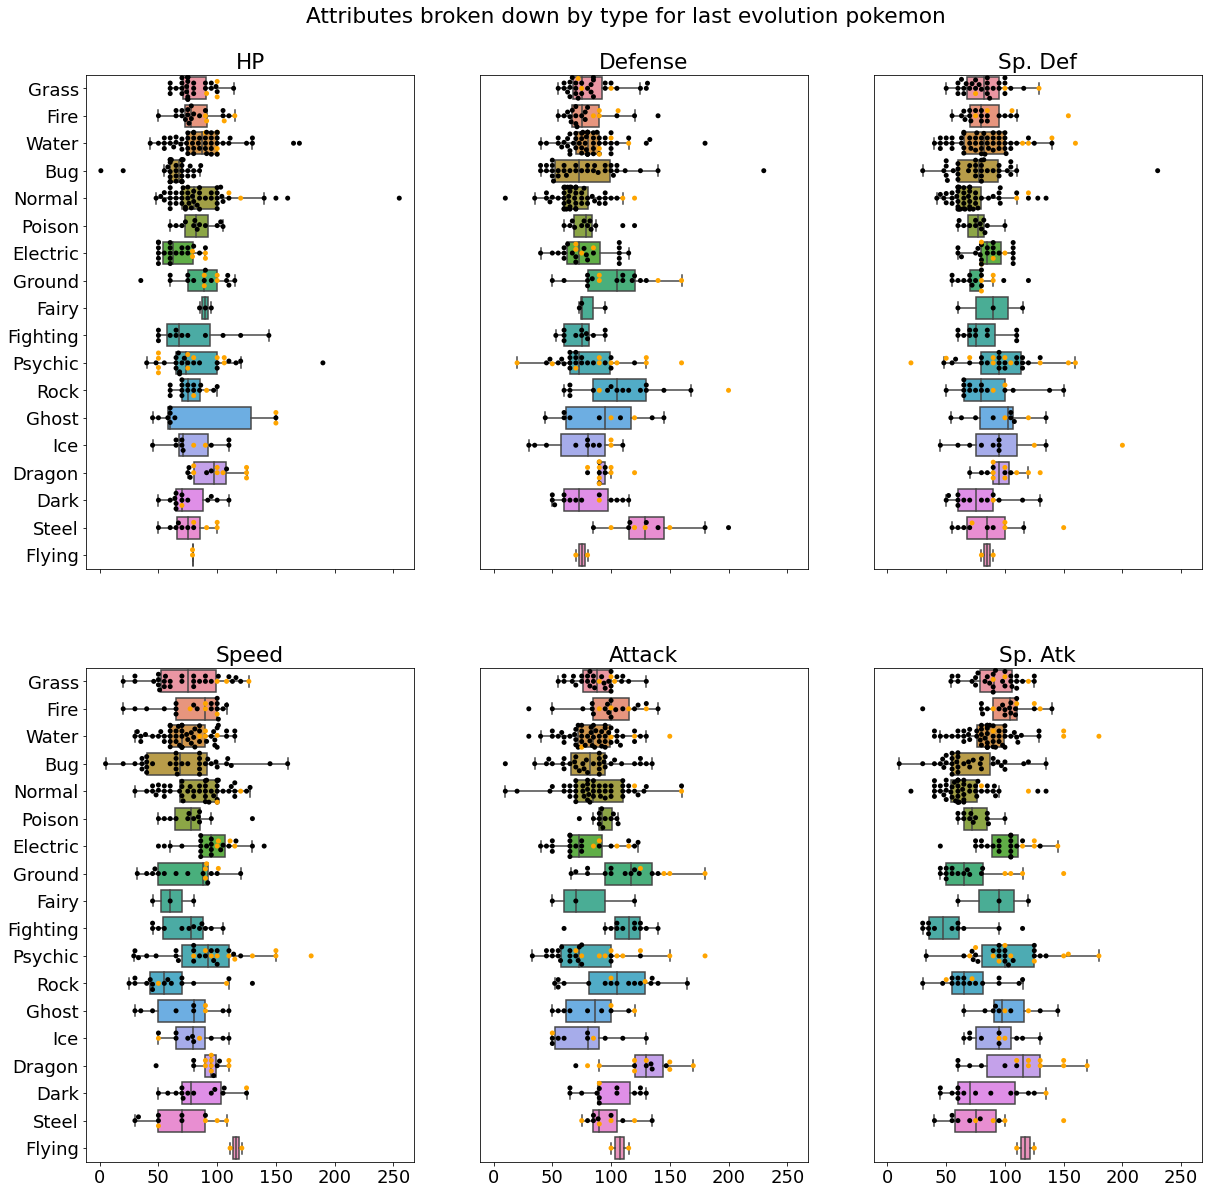

In [ ]:
(f, axes) = attr_per_type(my_evolved_pokemon, 'Type 1', 'Legendary')
_ = f.suptitle('Attributes broken down by type for last evolution pokemon', va='center', y=0.92)

Estos son los Pokémon reales que podrían usarse en una batalla de Pokémon, ya que tener una evolución significa que tus estadísticas aumentarán y tendrás acceso a un grupo de movimientos más amplio.

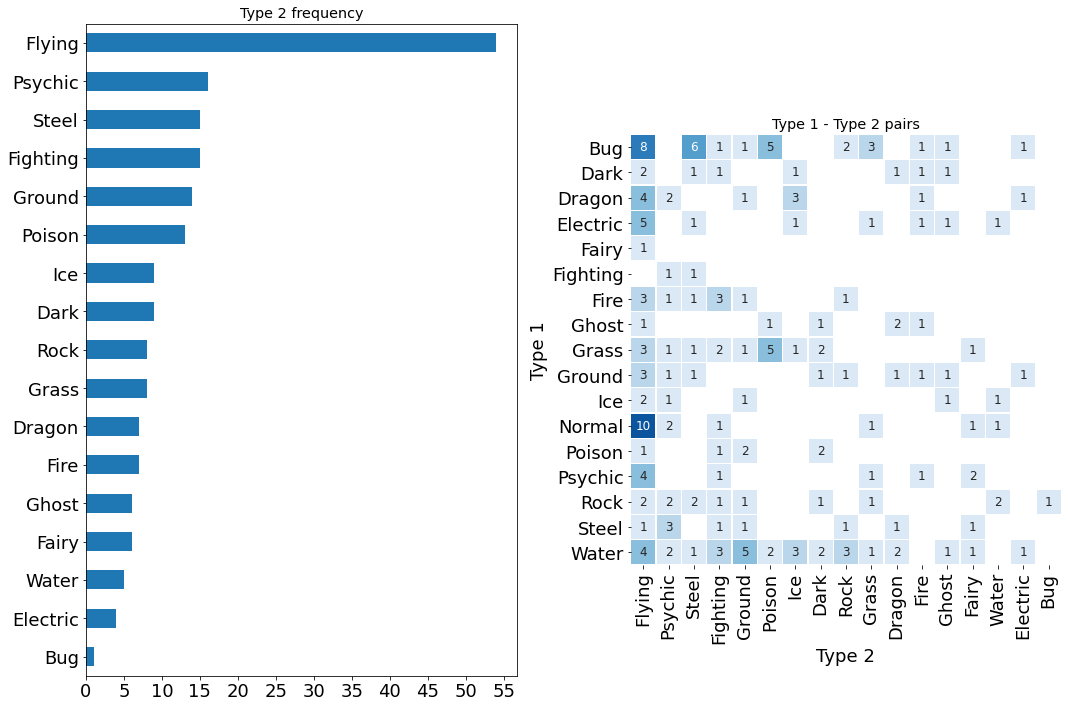

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
mpl.rcParams["font.size"] = 12

ax1 = my_evolved_pokemon.groupby('Type 2').size().sort_values().plot(kind='barh', ax=ax1)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 5))
ax1.axes.get_yaxis().get_label().set_visible(False)
_ = ax1.set_title('Type 2 frequency')

pivot_dat = my_evolved_pokemon.pivot_table(index='Type 1', columns='Type 2', aggfunc = 'size')
pivot_dat = pivot_dat[pivot_dat.sum().sort_values(ascending = False).index] #Reordering
ax2 = sns.heatmap(pivot_dat, annot=True, square=True, cmap=sns.color_palette("Blues"), cbar=False, linewidths=0.3, ax=ax2)
_ = ax2.set_title('Type 1 - Type 2 pairs')
fig.tight_layout()

In [ ]:
my_evolved_pokemon['New type'] = my_evolved_pokemon['Type 1']
my_evolved_pokemon['Dual type'] = ~pd.isnull(my_pokemon['Type 2'])
dual_evolved_pokemon = my_evolved_pokemon.append(my_evolved_pokemon[my_evolved_pokemon['Dual type']==True], ignore_index=True)

#Change the second instance of the pokemon to have the second type
dual_evolved_pokemon.loc[dual_evolved_pokemon.duplicated(), 'New type'] = dual_evolved_pokemon.loc[dual_evolved_pokemon.duplicated(), 'Type 2'] 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:

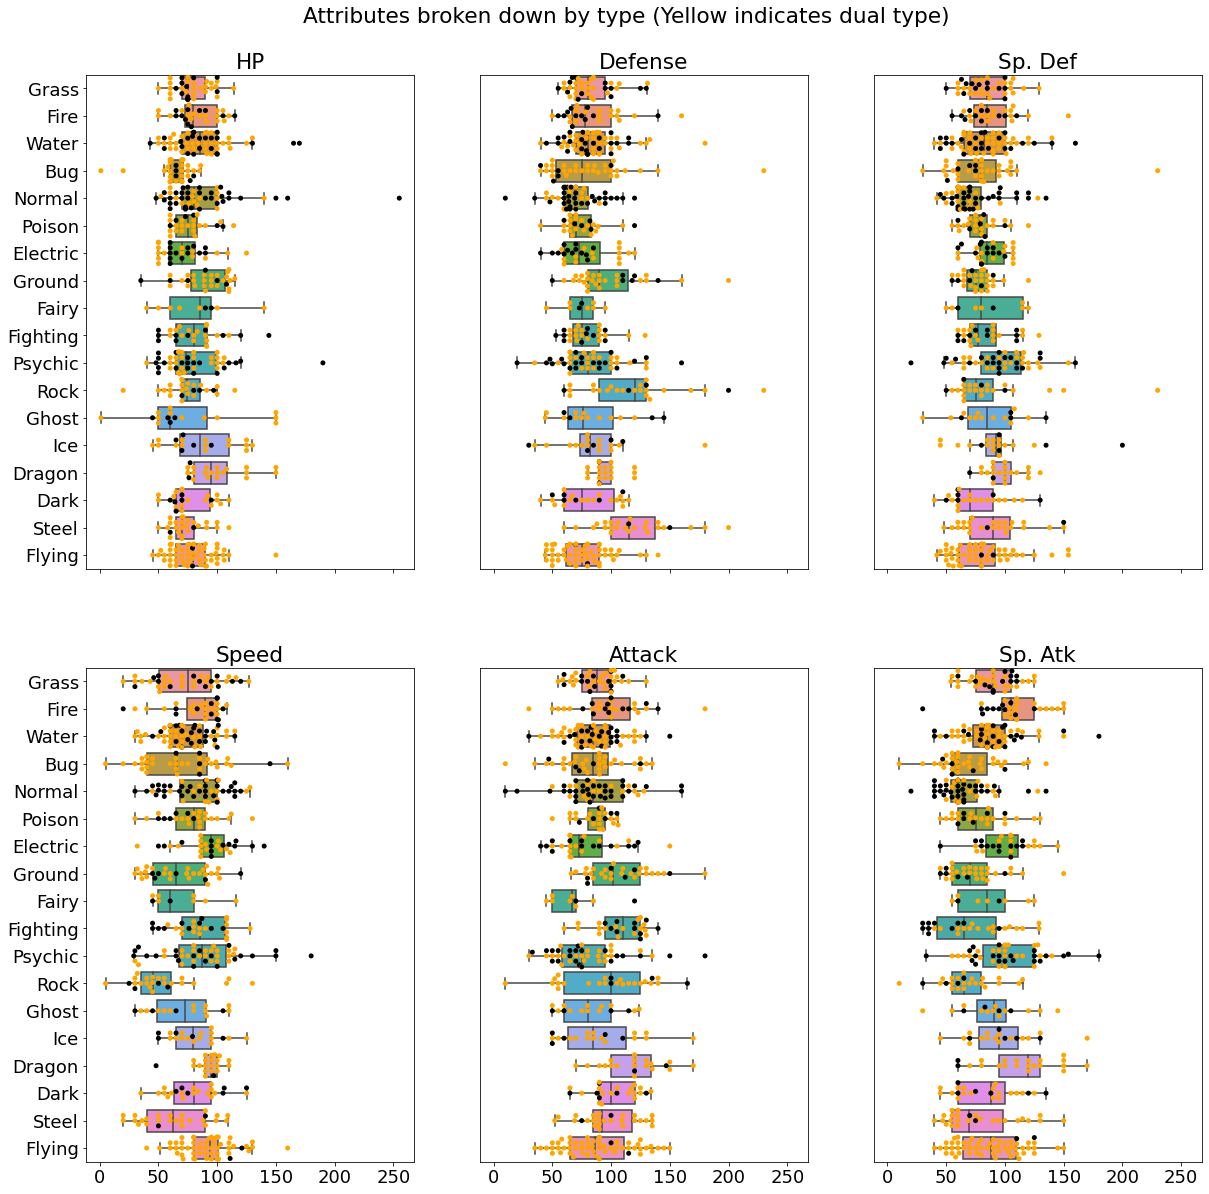

In [ ]:
(f, axes) = attr_per_type(dual_evolved_pokemon, 'New type', 'Dual type')
_ = f.suptitle("Attributes broken down by type (Yellow indicates dual type)", va='center', y=0.92)

In [ ]:
def create_radar_chart(input_df, group_col, col_num):
    poke_stats = input_df.loc[:, 'HP':'Speed']
    norm_poke_stats = poke_stats / poke_stats.max() #Let's normalise the data 
    radar_dat = pd.concat([norm_poke_stats, input_df.loc[:, [group_col, 'Name']]], axis=1)
    radar_dat_short = radar_dat.groupby([group_col]).mean().loc[:,['HP', 'Defense', 'Sp. Def', 'Speed', 'Sp. Atk', 'Attack']]
    radar_dat_short.columns = ['HP', 'Def', 'Sp. Def', 'Speed', 'Sp. Atk', 'Atk']
    
    fig = make_subplots(rows=4, cols=col_num, vertical_spacing = 0.08, horizontal_spacing=0.04, specs=[[{"type": "polar"}]*col_num]*4,  subplot_titles=radar_dat_short.index.values)
    chart_counter = 0

    for type in radar_dat_short.index.values:
        
        fig.add_trace(go.Scatterpolar(
              r=radar_dat_short.loc[type].values,
              theta=list(radar_dat_short.loc[type].index),
              fill='toself',
              name=type),
              row=chart_counter // col_num + 1, col=chart_counter % col_num + 1
        )
        chart_counter += 1
    print("HEYO2")
    initial_elements = [elem*col_num+1 for elem in range(4)] 
     
    polar_initial_list = ['polar' + str(num) for num in initial_elements]
    polar_rest_list = ['polar' + str(num) for num in list(set(range(1,18)) - set(initial_elements))]
    
    polar_initial = {pol: dict(
                radialaxis=dict(
                  visible=False,
                  range=[0, 1]
                ),

                angularaxis = dict(
                    #categoryorder = ['Defense', 'Attack', 'Sp. Def', 'Sp. Atk', 'Speed', 'HP']
                     categoryorder = 'array',
                    categoryarray = ['HP', 'Def', 'Sp. Def', 'Speed', 'Sp. Atk', 'Atk'],
                    rotation = 90
                )
                  ) for pol in polar_initial_list}

    polar_rest = {pol: dict(
                radialaxis=dict(
                  visible=False,
                  range=[0, 1]
                ),

                angularaxis = dict(
                    #categoryorder = ['Defense', 'Attack', 'Sp. Def', 'Sp. Atk', 'Speed', 'HP']
                     categoryorder = 'array',
                    categoryarray = ['HP', 'Def', 'Sp. Def', 'Speed', 'Sp. Atk', 'Atk'],
                    showticklabels=False,
                    rotation = 90
                )
                  ) for pol in polar_rest_list}

    polar_dict = {**polar_initial, **polar_rest}
    fig.update_layout(
              polar_dict,
              height = 800,
              width = 800,
              font=dict(size=8),
              showlegend=False,
              title={'text': "Average stats per pokemon type",
                     'font_size':15,
                     'y':0.95,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'}
              )
    
    fig_counter = 1
    for i in fig['layout']['annotations']:
        i['font'] = dict(size=12)
        if fig_counter in initial_elements:
            i['height'] = 35
        else:
            i['height'] = 15
        fig_counter += 1
    return(fig)
    #fig['layout'].xaxis1[{'automargin' : 'False'}]
    #fig.show()

In [ ]:
f = create_radar_chart(my_evolved_pokemon, 'Type 1', 5)
f.show()

HEYO2


En este gráfico, las diferencias entre tipos son más pronunciadas. Podemos ver claramente cuáles son los tipos que en promedio son fuertes y en qué atributo:

    Luchandor, Dragón (esto es una especie de trampa ya que la única última evolución de Pokémon Dragón es Dragonite...) y tipo Roca está alto en Ataque
    Fantasa y Electrico son buenos en Sp. Atk y velocidad
    El acero es el que tiene mayor defensa
    Ningún tipo es tan bueno en Sp. Def y HP principalmente porque tenemos algunos valores atípicos distintos (Blissey, Shuckle, etc.)

Intentemos tener el mismo gráfico pero con los tipos duales incluidos para ver cómo y si cambia

----

Pokémon de última evolución teniendo en cuenta su tipo dual



In [ ]:
f = create_radar_chart(dual_evolved_pokemon, 'New type', 5)
f.show()

HEYO2


**Próximos pasos**

Se podrá hacer un clasificador de pokemon?

In [ ]:
pokemons = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/data/pokemon2.csv')
numbers = []
for i in range(1,pokemons.shape[0]+1):
    numbers.append(i)
pokemons['pkn'] = numbers
IMG_DIR = '/content/drive/My Drive/Colab Notebooks/Datasets/data/pokemon2'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]

In [ ]:
import re
dataframe_img = pd.DataFrame([])
images = []
pokemon_number = []
for img in onlyfiles:
    if not re.search('-', img):
        pkn = img.split('.')
        n = re.sub("[^0-9]", "", pkn[0])
        path = IMG_DIR +'/' +str(img)
        images.append(path)
        pokemon_number.append(n)
dataframe_img['images'] = images
dataframe_img['pkn'] = pokemon_number
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
result = pokemons.merge(dataframe_img, left_on='pkn', right_on='pkn')
result

Name  ...                                             images
0         bulbasaur  ...  /content/drive/My Drive/Colab Notebooks/Datase...
1           ivysaur  ...  /content/drive/My Drive/Colab Notebooks/Datase...
2          venusaur  ...  /content/drive/My Drive/Colab Notebooks/Datase...
3        charmander  ...  /content/drive/My Drive/Colab Notebooks/Datase...
4        charmeleon  ...  /content/drive/My Drive/Colab Notebooks/Datase...
..              ...  ...                                                ...
703         yveltal  ...  /content/drive/My Drive/Colab Notebooks/Datase...
704      zygarde-50  ...  /content/drive/My Drive/Colab Notebooks/Datase...
705         diancie  ...  /content/drive/My Drive/Colab Notebooks/Datase...
706  hoopa-confined  ...  /content/drive/My Drive/Colab Notebooks/Datase...
707       volcanion  ...  /content/drive/My Drive/Colab Notebooks/Datase...

[708 rows x 5 columns]

In [ ]:
select = ['Water', 'Fire']
result = result[result['Type1'].isin(select)]
fig = go.Figure()

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[0]],
                     y=[result['Type1'].value_counts()[0]],
                     marker_color='blue',
                     name='water'
                     ))

fig.add_trace(go.Bar(x=[result['Type1'].value_counts().index[1]],
                     y=[result['Type1'].value_counts()[1]],
                     marker_color='red',
                     name='fire'
                    ))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'Pokemon Distribution',
        'width': 500, 
        'height': 400
})
fig.show()

import os
from shutil import copyfile
os.mkdir('train/')
os.mkdir('test/')
os.mkdir('val/')
for class_ in result['Type1'].unique():
    os.mkdir('train/'+str(class_)+'/')
    os.mkdir('test/'+str(class_)+'/')
    os.mkdir('val/'+str(class_)+'/')

In [ ]:
from sklearn.model_selection import train_test_split
print(result.size)
X_train, X_test, y_train, y_test = train_test_split(
    result, result['Type1'],test_size=0.50, stratify=result['Type1'])

print("" + str(X_train.size) + " " + str(X_test.size) + " " + str(y_train.size) + " " + str(y_test.size) )

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.33,stratify=y_test)

print("" + str(X_test.size) + " " + str(X_val.size) + " " + str(y_test.size) + " " + str(y_val.size) )

750
375 375 75 75
250 125 50 25


In [ ]:
y_test.size

50

In [ ]:
from shutil import copyfile, copy2

for image,type_  in zip(X_train['images'], y_train):
    copy2(image, '/content/drive/My Drive/Colab Notebooks/Datasets/data/pokemon2/train/'+type_)

for image,type_ in zip(X_test['images'], y_test):
    copy2(image, '/content/drive/My Drive/Colab Notebooks/Datasets/data/pokemon2/test/'+type_)
    
for image,type_ in zip(X_val['images'], y_val):
    copy2(image, '/content/drive/My Drive/Colab Notebooks/Datasets/data/pokemon2/val/'+type_)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

train = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Datasets/data/pokemon2/train/')
test = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Datasets/data/pokemon2/test/')
val = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Datasets/data/pokemon2/val/')

Found 75 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [ ]:
y_test.size

50

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from keras.preprocessing.image import ImageDataGenerator

def build():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax')) 

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    model.summary()
    return model
model = build()
history = model.fit_generator(train, epochs=30, validation_data=val)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 255, 255, 32)      416       
_________________________________________________________________
batch_normalization_4 (Batch (None, 255, 255, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 84, 84, 64)        8256      
_________________________________________________________________
batch_normalization_5 (Batch (None, 84, 84, 64)       

In [ ]:
predict = model.predict_generator(test)

In [ ]:
fig = go.Figure()
epochs = []
for i in range(len(history.history['acc'])):
    epochs.append(i)
fig.add_trace(go.Scatter(x=epochs,y=history.history['acc'], mode='lines',name='train'))
fig.add_trace(go.Scatter(x=epochs,y=history.history['val_acc'], mode='lines',name='val'))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'width': 500, 
        'height': 400

})
fig.show()

In [ ]:
from sklearn.metrics import classification_report
predict_frame = pd.DataFrame([])
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category']))

              precision    recall  f1-score   support

        Fire       0.44      0.25      0.32        16
       Water       0.71      0.85      0.77        34

    accuracy                           0.66        50
   macro avg       0.58      0.55      0.55        50
weighted avg       0.62      0.66      0.63        50



In [ ]:
def show_wrong_classification(y_test, predict, result):
    tmp = result[result.index.isin(y_test.index)]
    Gnrows = 7
    Gncols = 3
    fig, ax = plt.subplots(nrows=Gnrows, ncols=Gncols, figsize=(20, 20))
    i=0
    j=0
    for imag, true, pred in zip(tmp['images'], tmp['Type1'], predict):
        
        if true!=pred:
          if i<Gnrows:
            if j<Gncols:
              img = Image.open(imag)
              fig = plt.figure()
              ax[i][j].imshow(img)
              ax[i][j].set_title(str(pred))
              img.close()
              j+=1
            if j>=Gncols:
              j=0
              i+=1
        
              
              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



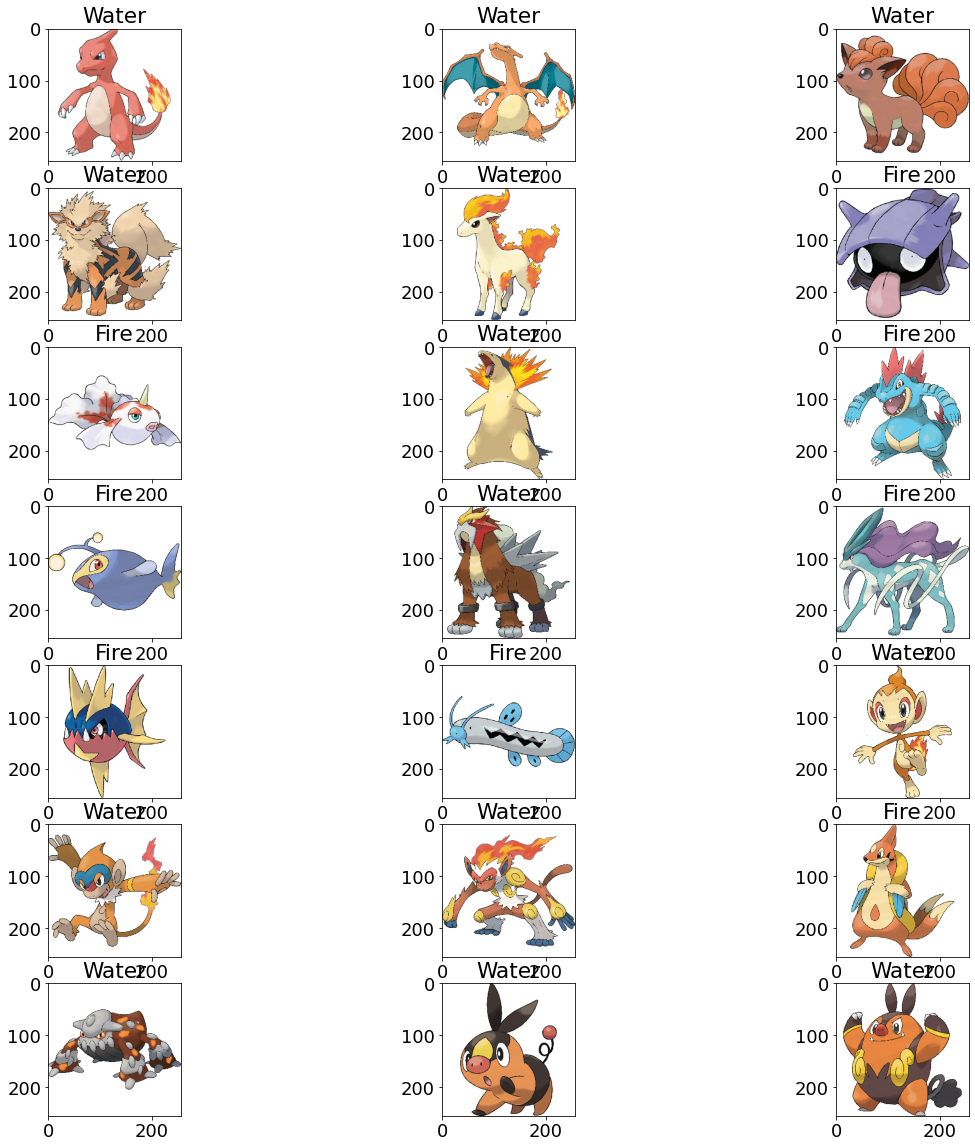

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
from PIL import Image
show_wrong_classification(y_test, predict_frame['category'], result)

## Aumento de datos

    Para intentar mejorar nuestro resultado, aplicaré algo de aumento de imagen.

* brillo



In [ ]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
img = load_img(water['images'][170])
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.5])
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

NameError: ignored

In [ ]:
# Zoom
img = load_img(fire['images'][156])
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5, 1.0])
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

NameError: ignored

In [ ]:
# Rotacion
img = load_img(water['images'][118])
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=35)
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

In [ ]:
datagentrain = ImageDataGenerator(rotation_range=35, 
                                 zoom_range=[0.5, 1.0], 
                                 brightness_range=[0.2,1.5])

datagen = ImageDataGenerator()

train = datagentrain.flow_from_directory('train/')
test = datagen.flow_from_directory('test/')
val = datagen.flow_from_directory('val/')

In [ ]:
model = build()
history = model.fit_generator(train, epochs=30, validation_data=val)

In [ ]:
fig = go.Figure()
epochs = []
for i in range(len(history.history['acc'])):
    epochs.append(i)
fig.add_trace(go.Scatter(x=epochs,y=history.history['acc'], mode='lines',name='train'))
fig.add_trace(go.Scatter(x=epochs,y=history.history['val_acc'], mode='lines',name='val'))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'width': 500, 
        'height': 400

})
fig.show()

In [ ]:
predict_frame = pd.DataFrame([])
predict = model.predict_generator(test)
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category']))

In [ ]:
show_wrong_classification(y_test, predict_frame['category'], result)

Por lo tanto, una clasificación de los Pokémon de tipo fuego se ve afectada debido a que el canal rojo de los Pokémon de tipo agua es muy difícil de realizar la clasificación correctamente incluso con el aumento.

# Algoritmos de clasificación

## Importar data

In [ ]:
# Import csv
pokemon = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/data/Pokemon.csv')

In [ ]:
pokemon

#                   Name   Type 1  ... Speed  Generation  Legendary
0      1              Bulbasaur    Grass  ...    45           1      False
1      2                Ivysaur    Grass  ...    60           1      False
2      3               Venusaur    Grass  ...    80           1      False
3      3  VenusaurMega Venusaur    Grass  ...    80           1      False
4      4             Charmander     Fire  ...    65           1      False
..   ...                    ...      ...  ...   ...         ...        ...
795  719                Diancie     Rock  ...    50           6       True
796  719    DiancieMega Diancie     Rock  ...   110           6       True
797  720    HoopaHoopa Confined  Psychic  ...    70           6       True
798  720     HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721              Volcanion     Fire  ...    70           6       True

[800 rows x 13 columns]

## Acotar columnas

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#Modificación del dataframme
# Ignoramos #, Name, Type 2 (DUDA: NaN)
pokemon_info = pokemon.iloc[:, 4:12]
pokemon_info.drop(['Generation'], axis = 'columns', inplace = True)
pokemon_info['Legendary'] = labelencoder_X.fit_transform(pokemon['Legendary'])
pokemon_info.tail()

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
795    600  50     100      150      100      150     50          1
796    700  50     160      110      160      110    110          1
797    600  80     110       60      150      130     70          1
798    680  80     160       60      170      130     80          1
799    600  80     110      120      130       90     70          1

## Categorización de datos

In [ ]:
# Categorización de Total, HP, Defense, Sp, Speed

def Total(dataframe):
    dataframe.loc[dataframe['Total'] <= 200, 'Total'] = 0
    dataframe.loc[(dataframe['Total'] > 200) & (dataframe['Total'] <= 400), 'Total'] = 1
    dataframe.loc[(dataframe['Total'] > 400) & (dataframe['Total'] <= 600), 'Total'] = 2
    dataframe.loc[(dataframe['Total'] > 600) & (dataframe['Total'] <= 800), 'Total'] = 3
    return dataframe


def HP(dataframe):
    dataframe.loc[dataframe['HP'] <= 50, 'HP'] = 0
    dataframe.loc[(dataframe['HP'] > 50) & (dataframe['HP'] <= 150), 'HP'] = 1
    dataframe.loc[(dataframe['HP'] > 150) & (dataframe['HP'] <= 250), 'HP'] = 2
    dataframe.loc[(dataframe['HP'] > 250) & (dataframe['HP'] <= 350), 'HP'] = 3
    return dataframe

def Defense(dataframe):
    dataframe.loc[dataframe['Defense'] <= 50, 'Defense'] = 0
    dataframe.loc[(dataframe['Defense'] > 50) & (dataframe['Defense'] <= 150), 'Defense'] = 1
    dataframe.loc[(dataframe['Defense'] > 150) & (dataframe['Defense'] <= 250), 'Defense'] = 2
    return dataframe


def SpAtk(dataframe):
    dataframe.loc[dataframe['Sp. Atk'] <= 50, 'Sp. Atk'] = 0
    dataframe.loc[(dataframe['Sp. Atk'] > 50) & (dataframe['Sp. Atk'] <= 100), 'Sp. Atk'] = 1
    dataframe.loc[(dataframe['Sp. Atk'] > 100) & (dataframe['Sp. Atk'] <= 150), 'Sp. Atk'] = 2
    dataframe.loc[(dataframe['Sp. Atk'] > 150) & (dataframe['Sp. Atk'] <= 200), 'Sp. Atk'] = 3
    dataframe.loc[(dataframe['Sp. Atk'] > 200) & (dataframe['Sp. Atk'] <= 250), 'Sp. Atk'] = 4
    return dataframe


def SpDef(dataframe):
    dataframe.loc[dataframe['Sp. Def'] <= 50, 'Sp. Def'] = 0
    dataframe.loc[(dataframe['Sp. Def'] > 50) & (dataframe['Sp. Def'] <= 100), 'Sp. Def'] = 1
    dataframe.loc[(dataframe['Sp. Def'] > 100) & (dataframe['Sp. Def'] <= 150), 'Sp. Def'] = 2
    dataframe.loc[(dataframe['Sp. Def'] > 150) & (dataframe['Sp. Def'] <= 200), 'Sp. Def'] = 3
    dataframe.loc[(dataframe['Sp. Def'] > 200) & (dataframe['Sp. Def'] <= 250), 'Sp. Def'] = 4
    return dataframe

    
def Speed(dataframe):
    dataframe.loc[dataframe['Speed'] <= 50, 'Speed'] = 0
    dataframe.loc[(dataframe['Speed'] > 50) & (dataframe['Speed'] <= 100), 'Speed'] = 1
    dataframe.loc[(dataframe['Speed'] > 100) & (dataframe['Speed'] <= 150), 'Speed'] = 2
    dataframe.loc[(dataframe['Speed'] > 150) & (dataframe['Speed'] <= 200), 'Speed'] = 3
    return dataframe

def Attack(dataframe):
    dataframe.loc[dataframe['Attack'] <= 50, 'Attack'] = 0
    dataframe.loc[(dataframe['Attack'] > 50) & (dataframe['Attack'] <= 100), 'Attack'] = 1
    dataframe.loc[(dataframe['Attack'] > 100) & (dataframe['Attack'] <= 150), 'Attack'] = 2
    dataframe.loc[(dataframe['Attack'] > 150) & (dataframe['Attack'] <= 200), 'Attack'] = 3
    return dataframe
'''Total(pokemon_info)
HP(pokemon_info)
Defense(pokemon_info)
SpAtk(pokemon_info)
SpDef(pokemon_info)
Speed(pokemon_info)
Attack(pokemon_info)'''
pokemon_info


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
0      318  45      49       49       65       65     45          0
1      405  60      62       63       80       80     60          0
2      525  80      82       83      100      100     80          0
3      625  80     100      123      122      120     80          0
4      309  39      52       43       60       50     65          0
..     ...  ..     ...      ...      ...      ...    ...        ...
795    600  50     100      150      100      150     50          1
796    700  50     160      110      160      110    110          1
797    600  80     110       60      150      130     70          1
798    680  80     160       60      170      130     80          1
799    600  80     110      120      130       90     70          1

[800 rows x 8 columns]

## Plots de Total e incidencia

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



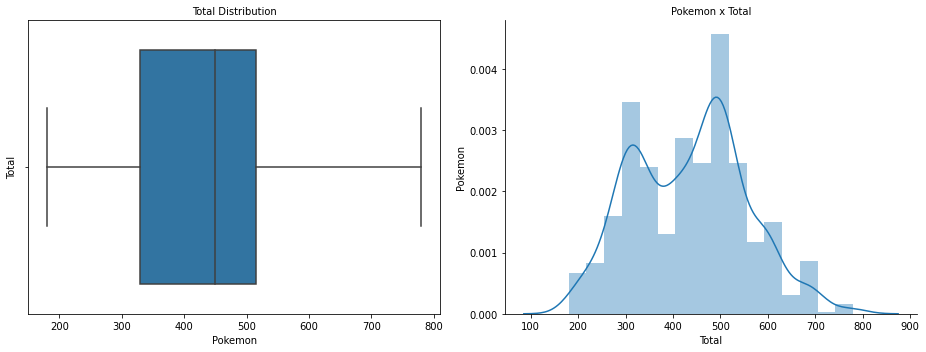

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Total', data = pokemon_info, orient = 'v', ax = ax1)
ax1.set_xlabel('Pokemon', fontsize=10)
ax1.set_ylabel('Total', fontsize=10)
ax1.set_title('Total Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(pokemon_info['Total'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Total', fontsize=10)
ax2.set_ylabel('Pokemon', fontsize=10)
ax2.set_title('Pokemon x Total', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

## Split de datos

In [ ]:
# Separamos la columna de Legendary 
Y = pokemon_info["Legendary"]
X = pokemon_info.drop(['Legendary'], axis = 'columns')

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
len(X_over)

1470

In [ ]:
for i in range(len(y_over)):
  if y_over[i] == 0:
    print(X_over[i], y_over[i])


In [ ]:
# Split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size = 0.5, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
#Escalar de datos
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [ ]:
X_test

array([[460,  70, 100, ..., 105,  75,  40],
       [670, 100, 100, ..., 150, 140,  90],
       [363,  60,  85, ...,  60,  49,  60],
       ...,
       [600, 100, 100, ..., 100, 100, 100],
       [580,  79, 100, ..., 110,  90, 121],
       [680, 100, 150, ..., 120, 100,  90]])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave ra

k=1 97.96 (+/- 1.63)
k=2 97.96 (+/- 1.63)
k=3 96.94 (+/- 1.01)
k=4 96.60 (+/- 1.32)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave ra

k=5 96.69 (+/- 1.49)
k=6 96.69 (+/- 1.49)
k=7 96.43 (+/- 1.45)
k=8 96.52 (+/- 1.44)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave ra

k=9 96.35 (+/- 1.47)
k=10 96.35 (+/- 1.47)
k=11 96.26 (+/- 1.43)
k=12 96.60 (+/- 1.51)
k=13 96.34 (+/- 1.57)
k=14 96.43 (+/- 1.51)
k=15 96.00 (+/- 1.42)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave ra

k=16 96.00 (+/- 1.42)
k=17 95.92 (+/- 1.41)
k=18 95.92 (+/- 1.41)
k=19 95.58 (+/- 1.46)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave ra

k=20 95.58 (+/- 1.46)
k=21 95.58 (+/- 1.46)
k=22 95.66 (+/- 1.45)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



k=23 95.58 (+/- 1.46)
k=24 95.75 (+/- 1.37)
k=25 95.75 (+/- 1.37)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



k=26 95.83 (+/- 1.34)
k=27 95.75 (+/- 1.37)
k=28 95.83 (+/- 1.34)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



k=29 95.83 (+/- 1.34)
k=30 95.83 (+/- 1.34)
k=31 95.83 (+/- 1.34)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



k=32 95.83 (+/- 1.34)
k=33 95.75 (+/- 1.37)
k=34 95.75 (+/- 1.37)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



k=35 95.66 (+/- 1.39)
k=36 95.66 (+/- 1.39)
k=37 95.66 (+/- 1.39)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



k=38 95.66 (+/- 1.39)
k=39 95.66 (+/- 1.39)
k=40 95.66 (+/- 1.39)
The optimal number of neighbors is 0 with 98.0%


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



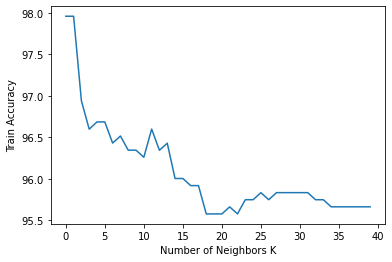

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(X_over, y_over, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,40)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

############
# Logistic Regression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
alg1 = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
############
# K Neighbors
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
alg2 = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
############
# Decision tree
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
alg3 = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
############
# Random Forest
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
alg4 = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [ ]:
models = pd.DataFrame({
                'Models': ['Logistic Regression', 'K-Near Neighbors', 'Decision Tree Classifier', 'Random Forest'],
                'Score':  [alg1, alg2, alg3, alg4]})

models.sort_values(by='Score', ascending=False)

Models     Score
3             Random Forest  0.978267
2  Decision Tree Classifier  0.976879
0       Logistic Regression  0.965994
1          K-Near Neighbors  0.964680

In [ ]:
from sklearn.metrics import classification_report
print('Decision Tree Classifier\n',classification_report(y_test, dtreepred))
print('Random Forest\n',classification_report(y_test, rfcpred))


Decision Tree Classifier
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       375
           1       0.96      1.00      0.98       360

    accuracy                           0.98       735
   macro avg       0.98      0.98      0.98       735
weighted avg       0.98      0.98      0.98       735

Random Forest
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       375
           1       0.94      1.00      0.97       360

    accuracy                           0.97       735
   macro avg       0.97      0.97      0.97       735
weighted avg       0.97      0.97      0.97       735



In [ ]:
# Pruebas con los algoritmos
test = np.array([[670.0, 92.0, 130.0, 115.0, 80.0, 115.0, 138.0]])
expected_res = 1
############
# Logistic Regression
logpred = logmodel.predict(test)[0]
############
# K Neighbors
knnpred = knn.predict(test)[0]
############
# Decision tree
dtreepred = dtree.predict(test)[0]
############
# Random Forest
rfcpred = rfc.predict(test)[0]

if logpred == expected_res:
  print('Logistic regression, correct prediction', logpred)
else:
  print('Logistic regression, wrong prediction', logpred)

if knnpred == expected_res:
  print('K Neighbors, correct prediction', knnpred)
else:
  print('K Neighbors, wrong prediction', knnpred)

if dtreepred == expected_res:
  print('Decision Tree, correct prediction', dtreepred)
else:
  print('Decision Tree, wrong prediction', dtreepred)

if rfcpred == expected_res:
  print('Random Forest, correct prediction', rfcpred)
else:
  print('Random Forest, wrong prediction', rfcpred)

Logistic regression, correct prediction 1
K Neighbors, correct prediction 1
Decision Tree, correct prediction 1
Random Forest, correct prediction 1


In [ ]:
# Pruebas con los algoritmos
test = np.array([[450.0, 250.0, 5.0, 5.0, 35.0, 105.0, 50.0]])
expected_res = 0
############
# Logistic Regression
logpred = logmodel.predict(test)[0]
############
# K Neighbors
knnpred = knn.predict(test)[0]
############
# Decision tree
dtreepred = dtree.predict(test)[0]
############
# Random Forest
rfcpred = rfc.predict(test)[0]

if logpred == expected_res:
  print('Logistic regression, correct prediction', logpred)
else:
  print('Logistic regression, wrong prediction', logpred)

if knnpred == expected_res:
  print('K Neighbors, correct prediction', knnpred)
else:
  print('K Neighbors, wrong prediction', knnpred)

if dtreepred == expected_res:
  print('Decision Tree, correct prediction', dtreepred)
else:
  print('Decision Tree, wrong prediction', dtreepred)

if rfcpred == expected_res:
  print('Random Forest, correct prediction', rfcpred)
else:
  print('Random Forest, wrong prediction', rfcpred)

Logistic regression, correct prediction 0
K Neighbors, correct prediction 0
Decision Tree, correct prediction 0
Random Forest, correct prediction 0


In [ ]:
# Pruebas con los algoritmos
test = np.array([[530,  88, 107, 122,  74,  75,  64]])
expected_res = 0
############
# Logistic Regression
logpred = logmodel.predict(test)[0]
############
# K Neighbors
knnpred = knn.predict(test)[0]
############
# Decision tree
dtreepred = dtree.predict(test)[0]
############
# Random Forest
rfcpred = rfc.predict(test)[0]

if logpred == expected_res:
  print('Logistic regression, correct prediction', logpred)
else:
  print('Logistic regression, wrong prediction', logpred)

if knnpred == expected_res:
  print('K Neighbors, correct prediction', knnpred)
else:
  print('K Neighbors, wrong prediction', knnpred)

if dtreepred == expected_res:
  print('Decision Tree, correct prediction', dtreepred)
else:
  print('Decision Tree, wrong prediction', dtreepred)

if rfcpred == expected_res:
  print('Random Forest, correct prediction', rfcpred)
else:
  print('Random Forest, wrong prediction', rfcpred)

Logistic regression, correct prediction 0
K Neighbors, correct prediction 0
Decision Tree, correct prediction 0
Random Forest, correct prediction 0
